<a href="https://colab.research.google.com/github/channingpitts/assignment2/blob/main/assignment2_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [ ]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 7.66 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  This paper is about efficient ways to have neat and well ordered data.
  
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
Tidy data standard is intended to make data analysis easier and mroe coherent.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
The first sentence is making reference to how tidy datasets are organized and easy to follow while messy datasets may all have unique issues or formatting that needs to be cleaned and organized appropriately. The second sentence shows issues of data between individuals as each person will have their own interpretation of what variables and observations mean to themselves versus the meaning from the researcher.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?
Values are either numbers of strings and organised in two ways. Variables contain all values that measure the same underlying attribute across units. Observations contain all values measured on the same unit across attributes.

  5. How is "Tidy Data" defined in section 2.3?
Tidy data is a standard way of mapping the meaning of a dataset to its structure with each variable forming a column, each observation forming a row, and each type of observational unit forming a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
The five most common problems include column headers are values not variable names, multiple variables stored in one column, variables stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit stored in multiple tables. Table 4 is messy because variables form both the rows and columns and the column headers are values rather than variable names. "Melting" a dataset refers to stacking data by turning columns into rows to store it differently.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
Table 11 is messy because variables are stored in both rows and columns and there are missing values. Table 12 is tidy and molten because columns contain names of variables and each row represents a day's observations.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
The "chicken-and-egg" problem is if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. He hopes there is a concerted effort and to use methodologies from various fields to improve the ability to design appropriate tools.

In [ ]:
airbnb = pd.read_csv('/content/assignment2/data/airbnb_hw.csv')
sharks = pd.read_csv('/content/assignment2/data/sharks.csv')

<ipython-input-4-0f514c08a76a>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('/content/assignment2/data/sharks.csv')


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
# 1
print(airbnb['Price'].describe())

# cleaning so commas are not an issue
airbnb['Price'] = airbnb['Price'].str.replace(",", '')

# convert from object to numeric since working with data for amounts for a stay
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Print and describe the new shape to analyze data / look for missing values
print(airbnb.shape)
print(airbnb['Price'].describe())

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
(30478, 13)
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


In [ ]:
# 2 CLEAN SHARKS
# cleaning 'Type' to only have categories of Unprovoked, Provoked, Watercraft, Invalid, Sea Disaster
# moving Boatomg, Boat, Boating to Watercraft
sharks['Type'] = sharks['Type'].str.replace('Boatomg', 'Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Boat', 'Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Boating', 'Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Watercrafting', 'Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Questionable', 'Invalid')
sharks['Type'] = sharks['Type'].str.replace('Unconfirmed', 'Invalid')
sharks['Type'] = sharks['Type'].str.replace('Unverified', 'Invalid')
sharks['Type'] = sharks['Type'].str.replace('Under investigation', 'Invalid')
sharks['Type'].value_counts()

Unprovoked      4716
Provoked         593
Invalid          565
Watercraft       344
Sea Disaster     239
Name: Type, dtype: int64

In [ ]:
# import pretrial data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [ ]:
# 3
# clean column
pre_trial = df.rename(columns = {'WhetherDefendantWasReleasedPretrial':'Released'})
# replacing 9 with np.nan
pre_trial['Released'] = pre_trial['Released'].replace(9,np.nan)
print(pre_trial['Released'].describe())

# dummy variable
var = 'Released'
pre_trial[var] = pre_trial[var].replace(' ', np.nan)
print(pre_trial[var].value_counts(), '\n')

count    22955.000000
mean         0.834415
std          0.371716
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Released, dtype: float64
1.0    19154
0.0     3801
Name: Released, dtype: int64 



In [ ]:
# 4 missing values, not at random
# changing column names for readability
pre_trial = df.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'Imposed Sentence',
                                 'SentenceTypeAllChargesAtConvictionInContactEvent':'Sentence Type'})

# replacing 4 with 0 because "deferred, etc." is not a specific enough Sentence Type
pre_trial['Sentence Type'] = pre_trial['Sentence Type'].replace(4,0)

# replacing 9 with 0 because these are not applicable Sentence Types
pre_trial['Sentence Type'] = pre_trial['Sentence Type'].replace(9,0)

# create a dummy variable
var = 'Imposed Sentence'

# Coerce the variable to numeric
pre_trial[var] = pd.to_numeric(pre_trial[var], errors='coerce')

print(pre_trial[var].describe(),'\n')

# Create a missing dummy
pre_trial['Imposed_NA'] = pre_trial[var].isnull()
print("missing", sum(pre_trial['Imposed_NA']),'\n')

count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: Imposed Sentence, dtype: float64 

missing 9053 



In [ ]:
pd.crosstab(pre_trial['Imposed Sentence'],pre_trial['Sentence Type'])

Sentence Type,0,1,2
Imposed Sentence,,,
0.000000,4953,0,0
0.032854,0,6,0
0.065708,3,21,0
0.098563,2,6,0
0.131417,4,10,0
...,...,...,...
1200.000000,0,0,1
1500.000000,0,0,1
1752.000000,0,0,1


**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
# 2
# observations
print(airbnb.shape)

# variables included
print(airbnb.columns.tolist())
print(airbnb.head())

(30478, 13)
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3  

In [ ]:
# 3
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])

# Apartments, Houses, and Lofts are common rentals available

# Private rooms are more common in Bed and Breakfasts, Castle, Chalet, Dorms, Houses, Huts, Others, Tents, and Treehouses

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: xlabel='Price', ylabel='Count'>

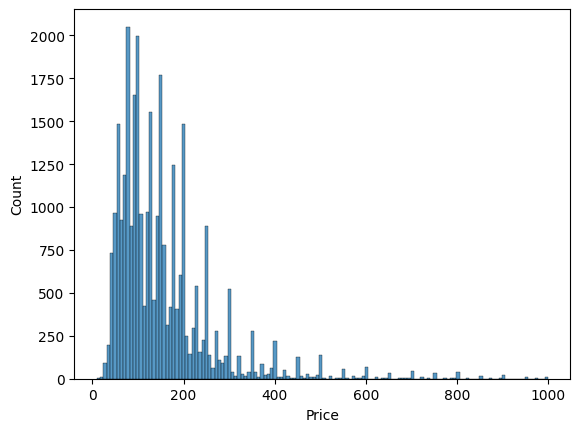

In [ ]:
# 4
sns.histplot(airbnb['Price'])


<Axes: xlabel='Price', ylabel='Density'>

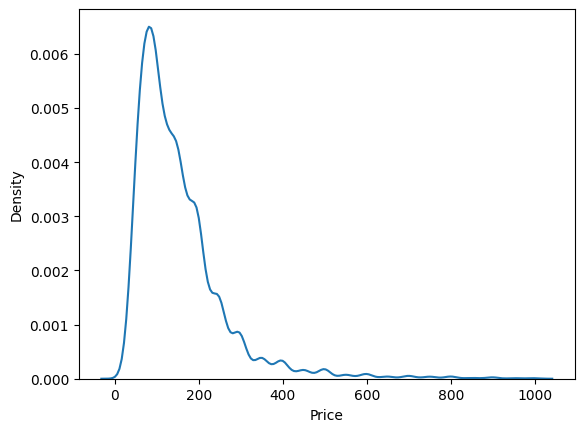

In [ ]:
sns.kdeplot(airbnb['Price'])

<Axes: xlabel='Price'>

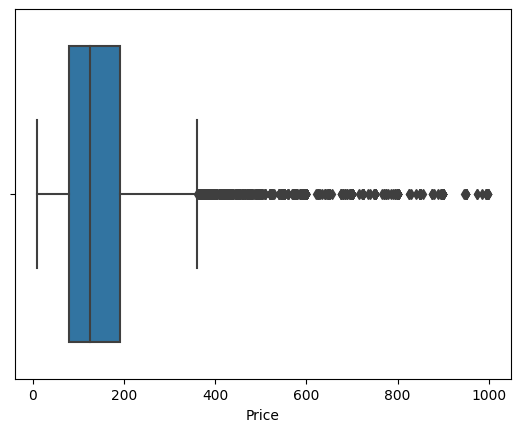

In [ ]:
sns.boxplot(data=airbnb, x='Price')

In [ ]:
# 4 statistical description
descr = airbnb['Price'].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Variance:  39119.085673448484 

IQR:  115.0


Axes(0.125,0.11;0.775x0.77) 

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64 

Variance:  0.39401233246166956 

IQR:  0.8909729238898656


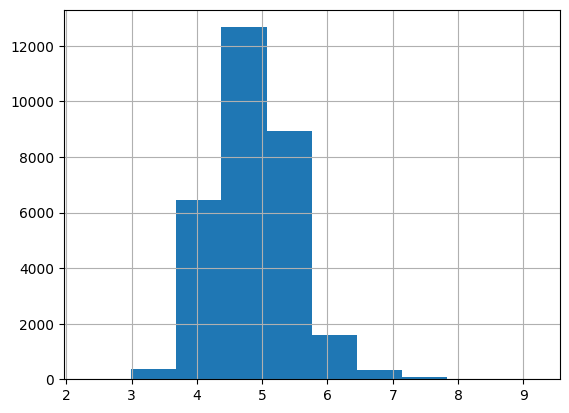

In [ ]:
#4  price_log
airbnb['price_log'] = np.log(airbnb['Price'])

var = 'price_log'
print(airbnb[var].hist(), '\n') #histogram

descr = airbnb[var].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)


Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

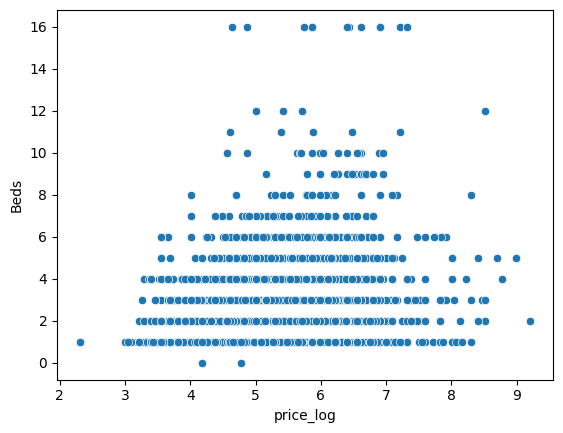

In [ ]:
# 5 scatterplot of price_log and Beds
sns.scatterplot(x=airbnb['price_log'],y=airbnb['Beds'])

var = 'Price'
group = 'Beds'
airbnb.loc[:,[group,var]].groupby(group).describe()

# The average price and standard deviations more or less increases due to the number of beds in a rental.
# Such large standard deviations suggest that the prices are more spread out from the mean.

<Axes: xlabel='price_log', ylabel='Beds'>

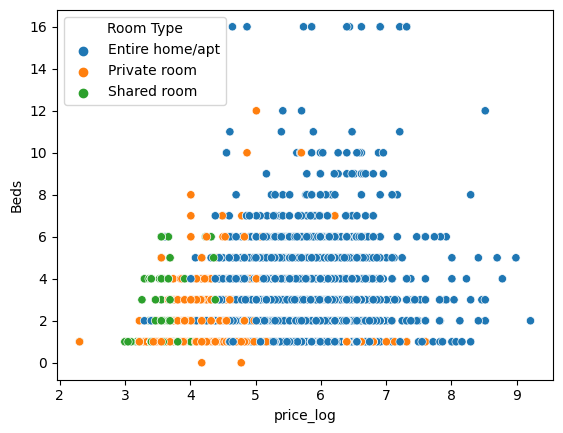

In [ ]:
# 6 colorful scatterplot
sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Room Type')


<Axes: xlabel='price_log', ylabel='Beds'>

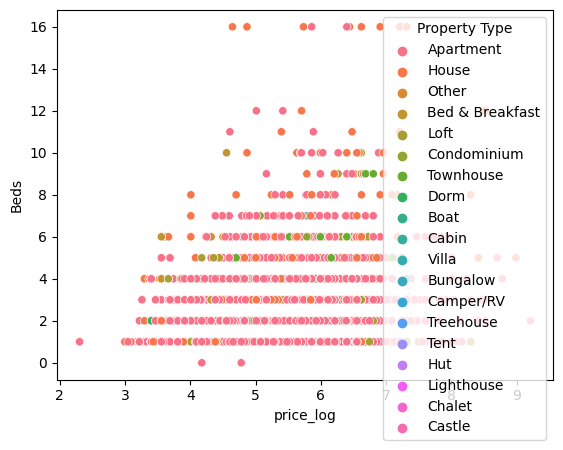

In [ ]:
sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Property Type')


In [ ]:
# 6
# The scatterplots for by Room Type and Property Type look very similar to each other.
# This could indicate a correlation between the two when looking at beds and price
# Condos for Property Type and entire homes/apts for Room Type have the highest prices on average.
# Other for Property Type and entire homes/apts for Room Type have the highest standard deviation
# The median is a more reliable estiamte of central tendency because there are various outliers in the prices of rentals.


count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [ ]:
var = 'Price'
group = 'Property Type'
airbnb.loc[:,[group,var]].groupby(group).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

In [ ]:
var = 'Price'
group = 'Room Type'
airbnb.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

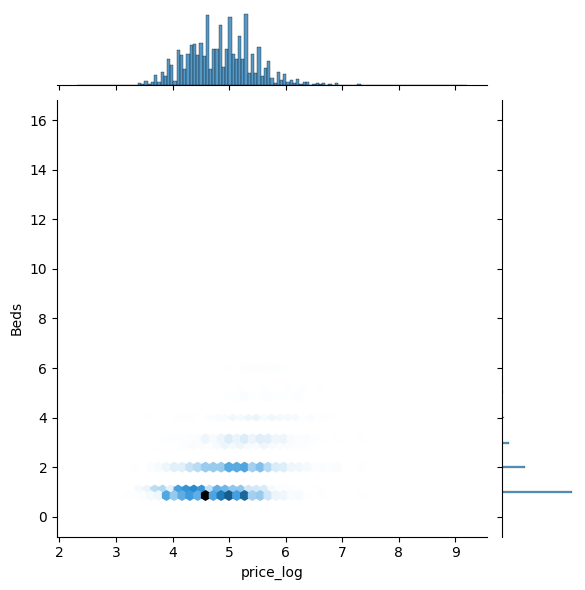

In [ ]:
# 7 jointplot with kind=hex
sns.jointplot(x='price_log',y='Beds',data=airbnb,kind='hex')

In [ ]:
# The data are actually distributed between 4-5 for price_log and 0-2 for Beds.
# Plots 5 and 6 can be questioned now since log scales down the large numbers / prices.